In [2]:
import torch

In [3]:
pipeline = {1 : "data (preprocessing)",
            2 : "build model",
            3 : "fitting the data to model",
            4:"making predictions and evaluating the model",
            5 : "saving the model",
            6:"putting it all together"}

In [4]:
pipeline

{1: 'data (preprocessing)',
 2: 'build model',
 3: 'fitting the data to model',
 4: 'making predictions and evaluating the model',
 5: 'saving the model',
 6: 'putting it all together'}

In [5]:
import torch.nn as nn  # contains all pytorch's building blocks
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu117'

# DATA PREPARING AND LOADING

image

video

dna

txt

csv spreadsheets

audio

In [6]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)

y = weight * X + bias

X[:10] , y[:10] , len(X) , len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

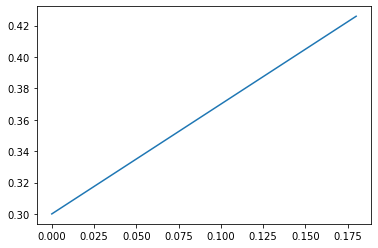

In [7]:
plt.plot(X[:10],y[:10])

In [8]:
%%time
train_split = int(0.8*len(X))

X_train , y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]

CPU times: user 50 µs, sys: 16 µs, total: 66 µs
Wall time: 67.5 µs


CPU times: user 16.3 ms, sys: 1.85 ms, total: 18.2 ms
Wall time: 11.5 ms


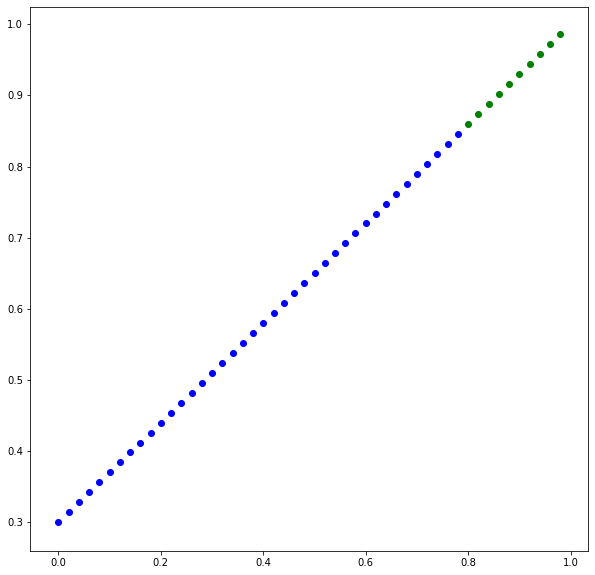

In [20]:
%%time
def predictionss(train_data,train_labels,test_data,test_labels,predictions = None):
    
    plt.figure(figsize=(10,10))
    plt.scatter(train_data,train_labels,c ="b",label = "Training data")
    plt.scatter(test_data,test_labels,c ="g",label = "Test data")
    if predictions is not None:
        plt.scatter(test_data,predictions,c ="r",label = "predictions")
        
predictionss(X_train,y_train,X_test,y_test)

start with random values 

look at trianing values and adjust the parameters accordingly to get closer to ideal weights and bias


by gradient descent 
   back propagation


requires _grad = true 

pytorch will track the gradients of the specific parameters for use with torch.autograd and gradient descent for many torch.nn modules it is set by default true

it will remember the differentiation operations and through back propagation it updates weights and bias

The call to super().__init__() inside the __init__ method is used to ensure that the initialization defined in the parent class (if any) is executed before the specific initialization of the subclass. This way, the subclass can benefit from the attributes and behavior defined in the parent class.

In [10]:
class LinearregressionModel(nn.Module):  # almost everything inherits from pytorch
    # base class for all neural network models
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
    def forward(self,  x : torch.Tensor) -> torch.Tensor:  # x is the innput data for the model 
        return self.weights*x + self.bias 
        
        
        # any subclass of forward function overrides the forward function in nn module 
        

Computational graphs are also called has neural networks

nn.parameter is also a torch layer

nn.Parameter is a specific class in PyTorch's torch.nn module used for defining learnable parameters within neural network models.
When you use nn.Parameter, you are explicitly declaring that the tensor is a model parameter, and it will be registered as part of the model's parameters. These parameters are the ones that will be updated during the training process when gradients are calculated and backpropagation is performed.
In this case, torch.rand(1) generates a random tensor of shape (1,) with values between 0 and 1. Since it is wrapped in nn.Parameter, it becomes a learnable parameter of the model with requires_grad set to True, meaning it will be optimized during training.
nn.Parameter objects are often used when you define custom neural network models and want to manually specify some of the model's parameters.

In [12]:
# torch.optim
model = LinearregressionModel()

list(model.parameters())


[Parameter containing:
 tensor([0.5269], requires_grad=True),
 Parameter containing:
 tensor([-1.3376], requires_grad=True)]

In [13]:
model.state_dict()

OrderedDict([('weights', tensor([0.5269])), ('bias', tensor([-1.3376]))])

In [23]:
y_preds1 = model(X_test)
y_preds1 

tensor([[-0.9161],
        [-0.9055],
        [-0.8950],
        [-0.8845],
        [-0.8739],
        [-0.8634],
        [-0.8529],
        [-0.8423],
        [-0.8318],
        [-0.8212]], grad_fn=<AddBackward0>)


The version counter is a number that is incremented every time a tensor is modified. This number is used by autograd to track the order of operations. When the version counter is not bumped, autograd is not able to track the order of operations, which can improve performance.

In PyTorch, when you perform an operation on a tensor, the version counter of the tensor is incremented. This is because autograd needs to track the order of operations in order to compute gradients. If the version counter of a tensor is not incremented, then autograd will not be able to track the order of operations, which can lead to errors.

In [14]:
with torch.inference_mode():  # during training or testing u dont need to be track of gradients
    y_preds = model(X_test)
    
y_preds

tensor([[-0.9161],
        [-0.9055],
        [-0.8950],
        [-0.8845],
        [-0.8739],
        [-0.8634],
        [-0.8529],
        [-0.8423],
        [-0.8318],
        [-0.8212]])

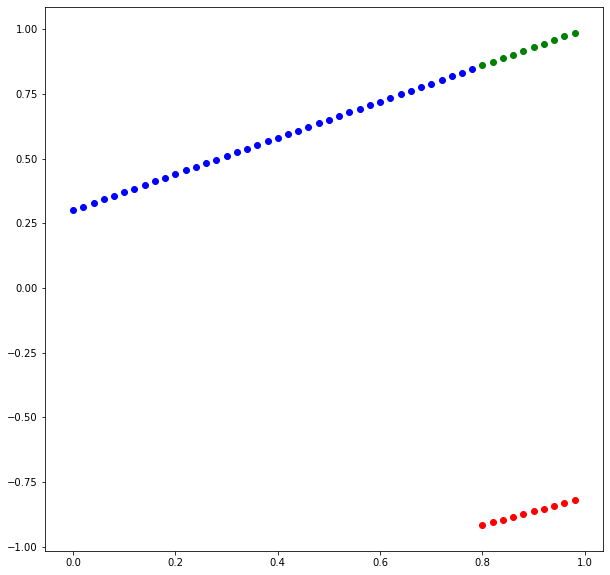

In [22]:
predictionss(X_train,y_train,X_test,y_test,predictions=y_preds)

Measure how poorly our model predicts we use loss function


In PyTorch, a criterion is a function that computes the loss between the predicted values and the actual values. It is used to train a machine learning model by minimizing the loss function.

The torch.nn module provides a number of built-in criteria, such as the CrossEntropyLoss and the MSELoss. These criteria can be used to compute the loss for a variety of machine learning problems.



mae_loss = torch.mean(torch.abs(y_pred-y_test))

In [24]:
import torch 
loss1 = torch.nn.L1Loss()



In [26]:
optimizer = torch.optim.SGD(params = model.parameters(),lr = 0.01,momentum = 0.9)

#smaller the lr smaller the change in parameters and larger the change in lr larger the change in parameters

Building a training loop

1. iterate through data

2. forward pass

3. calculate the loss

4. optimizer zero grad

5. backward pass  -  calculate the gradients with respct to the loss and update the gradients

6. optimizer step - make changes to the model parameters or optimizer arguments

The optimizer.zero_grad() method is used to clear out the gradients of all parameters that the optimizer is tracking. This is typically done before computing the gradients for a new batch of data.

The loss.backward() method is used to backpropagate the loss through the model. This means that the gradients of the loss are computed with respect to all of the parameters in the model.

The optimizer.step() method is used to update the parameters of the model. This is done by taking a step in the direction of the negative gradient of the loss.

In [30]:
# one loop through data
epochs = 1


# loop through data

for epoch in range(epochs):
    # se t the model to train mode
    model.train() # keep all parameters which requires grad makes true
    
    #model.eval()  # tuens off gradient track 
    y_pred_train = model(X_train)
    # claculate the loss
    loss = loss1(y_pred_train, y_train)
    
    
    optimizer.zero_grad()
    loss.backward()  # back propagate wrt the loss
    # optimizer 
    
    optimizer.step() # perform the gradient descent
    model.eval()
    


    



The optimizer.zero_grad() method in PyTorch is used to clear out the gradients of all parameters that the optimizer is tracking. This is typically done before computing the gradients for a new batch of data.

The gradients of a model's parameters are used to update the parameters during training. However, if the gradients are not cleared out before computing the gradients for a new batch of data, then the gradients from the previous batch of data will be carried over. This can lead to inaccurate gradient computations and ultimately poor model performance.

Get the data.

Forward pass.

Compute the loss.

Zero the gradients.

Backpropagate the loss.


Update the parameters.


![Screenshot from 2023-07-28 15-18-59.png](<attachment:Screenshot from 2023-07-28 15-18-59.png>)
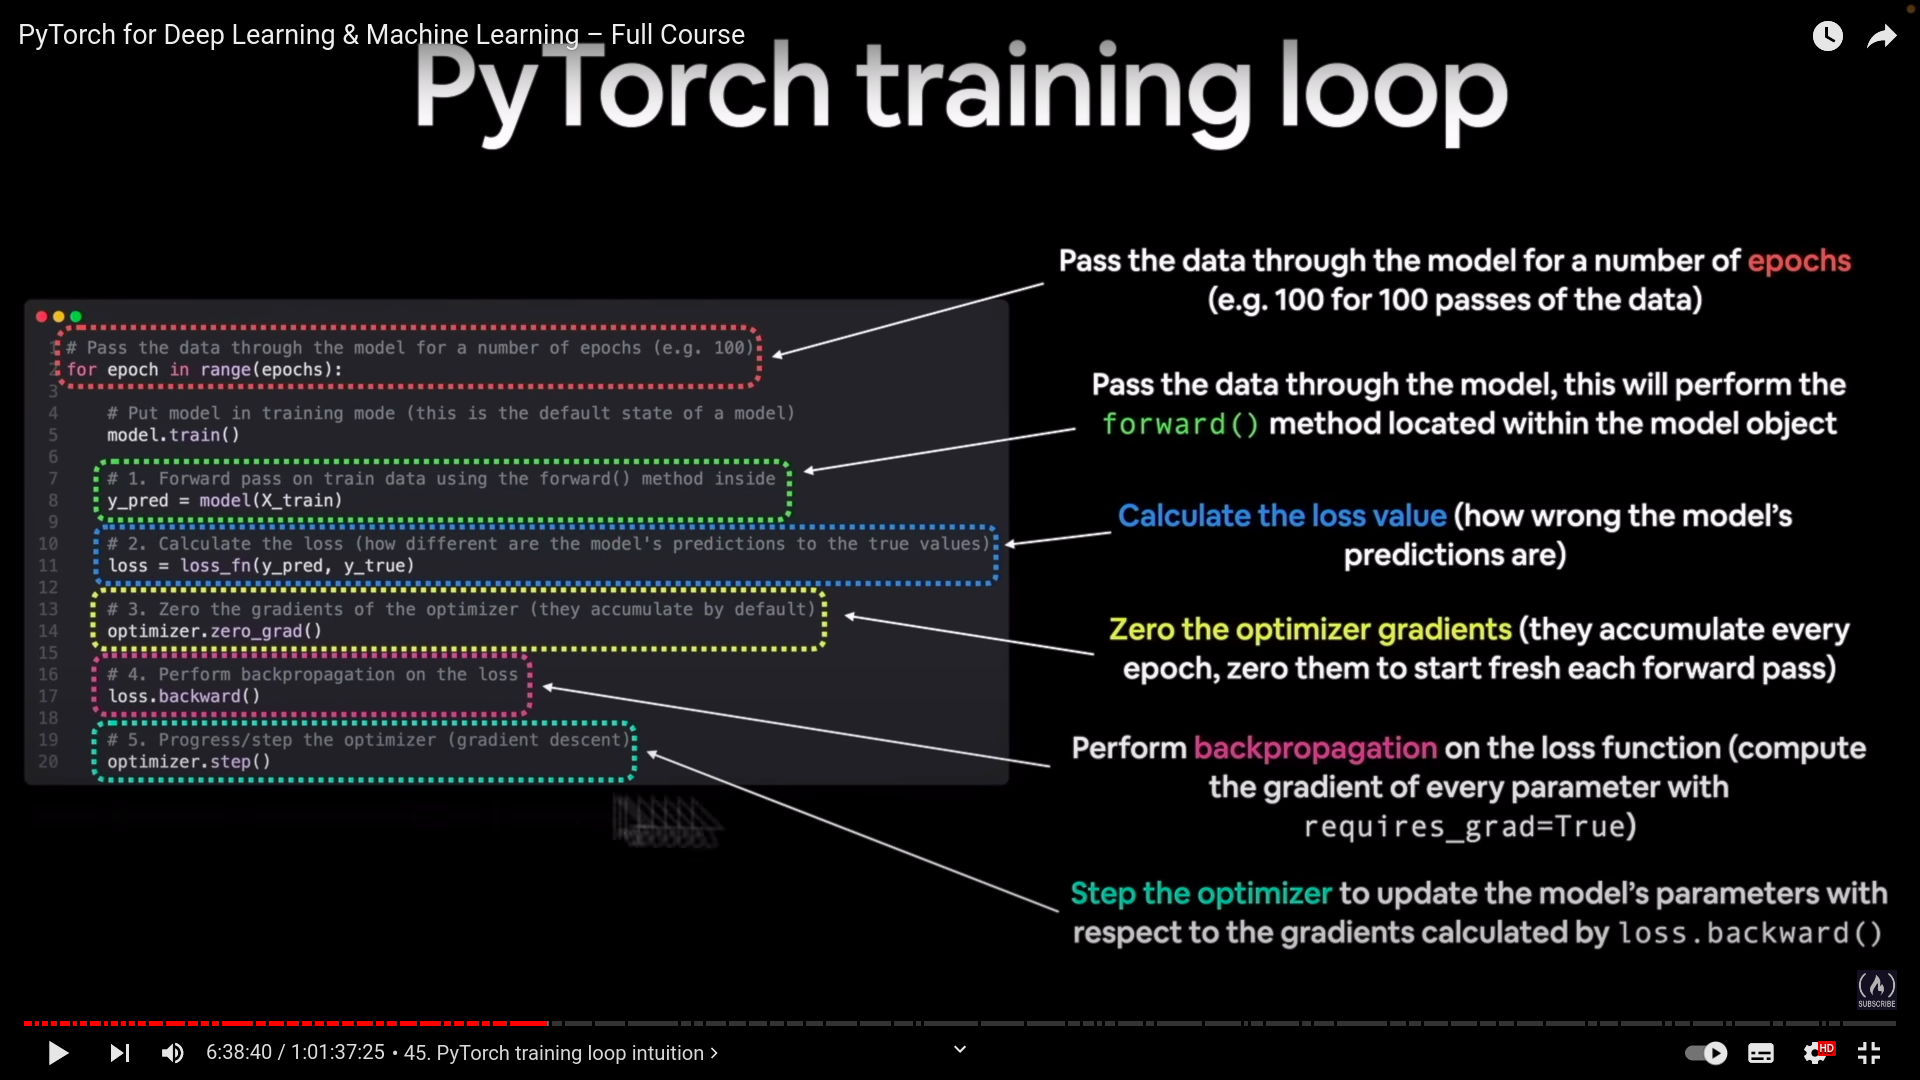

![Screenshot from 2023-07-28 14-06-47.png](<attachment:Screenshot from 2023-07-28 14-06-47.png>)
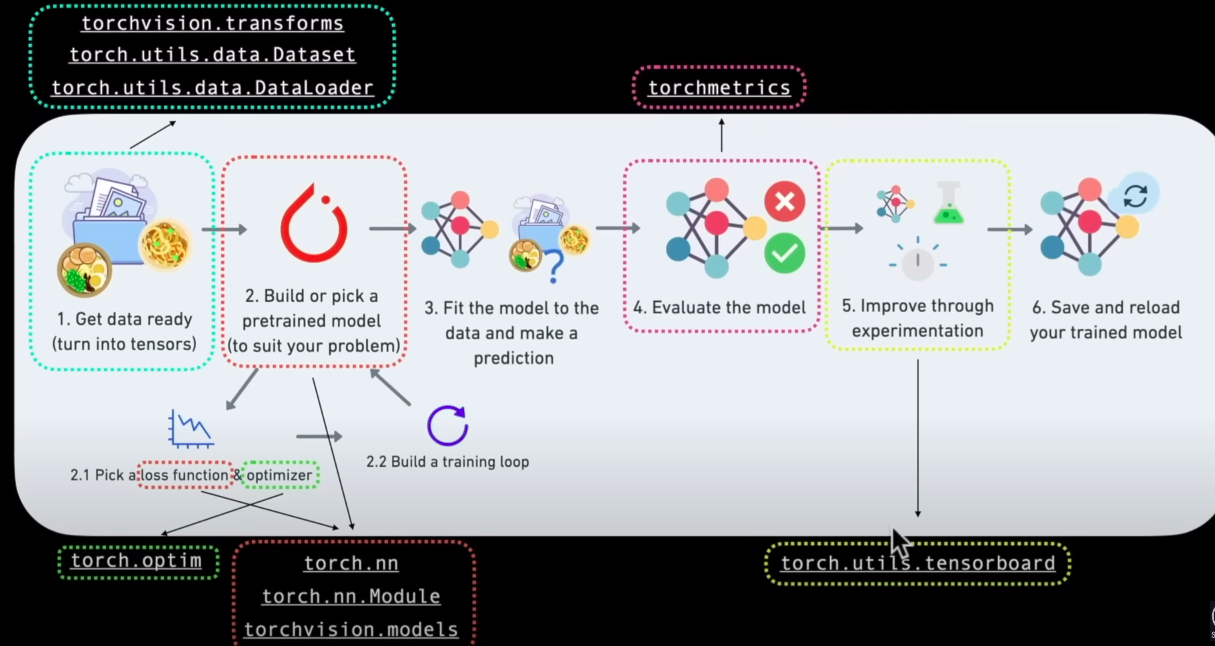

In PyTorch, the model.eval() method is used to set the model in evaluation mode. When you call model.eval(), it changes the behavior of certain layers in the model, specifically those that have different behaviors during training and testing (inference). Some layers like dropout and batch normalization behave differently during training and evaluation, and model.eval() ensures that these layers behave consistently during inference.

Here's what happens when you call model.eval():

Dropout Layers: Dropout layers are commonly used to prevent overfitting during training by randomly "dropping out" some neurons. During evaluation, you want the model to use all neurons to make predictions, so model.eval() disables dropout layers.

Batch Normalization Layers: Batch normalization layers normalize the activations of the previous layer to have zero mean and unit variance, which helps stabilize training. During inference, you want to use the learned statistics (mean and variance) from the training phase, so model.eval() sets the batch normalization layers to evaluation mode and uses the saved statistics.

Any Other Layers with Different Behaviors: Certain layers or operations might have different behaviors during training and testing. model.eval() ensures that the model uses consistent behavior during inference.

It's important to note that when you call model.eval(), you should also wrap your inference code with torch.no_grad() to disable gradient tracking during testing. This helps save memory and computational resources, as gradients are not needed during inference.